Quick analysis of some credit risk sheets using a support vector machine classifier

In [2]:
#Load in the datasets, take a look at them
import pandas as pd

data1_df = pd.read_excel("credit_risk_file_1.xlsx")
data1_df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [4]:
data2_df = pd.read_excel("credit_risk_file_2.xlsx")
data2_df.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [6]:
#Combining the datasets together
combined_df = pd.merge(data1_df, data2_df, on='PROSPECTID', how='inner')
combined_df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [8]:
#checking out some statistics
combined_df.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,...,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,...,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,680.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.164250,1.000000,0.000000,691.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,...,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,173800.000000,1.000000,1.000000,811.000000


In [10]:
#Model training
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [12]:
#One hot encoding
combined_df = pd.get_dummies(combined_df, columns=['last_prod_enq2', 'first_prod_enq2', 'HL_Flag', 'GL_Flag'])

In [14]:
X = combined_df.drop(columns=['PROSPECTID', 'Approved_Flag'])  #features
y = combined_df['Approved_Flag']  #target

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X)

In [18]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=69)

In [20]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = svm_model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9743864433190494

In [26]:
#Classification Report
target_names = svm_model.classes_.tolist()

report = classification_report(y_test, y_pred, target_names=target_names)

In [30]:
print(report)

              precision    recall  f1-score   support

          P1       0.95      0.98      0.96      1211
          P2       0.98      0.99      0.99      6396
          P3       0.97      0.87      0.92      1521
          P4       0.99      1.00      0.99      1140

    accuracy                           0.97     10268
   macro avg       0.97      0.96      0.97     10268
weighted avg       0.97      0.97      0.97     10268



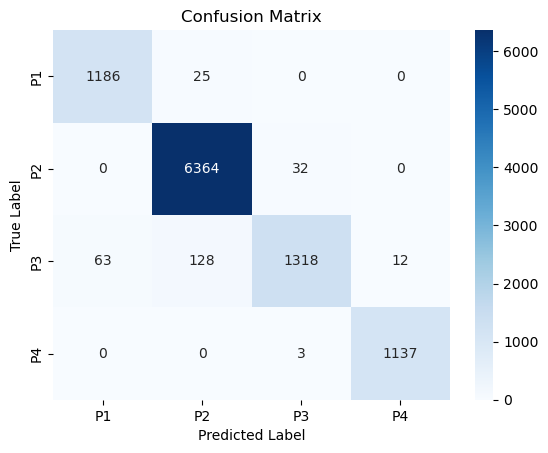

In [32]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Quick Observations:
- Imbalanced Predictions: The model seems heavily skewed towards correctly predicting P2, possibly because P2 has the highest number of samples. This could indicate an imbalanced dataset.
- Improving Misclassifications: The confusion between P3 and P2 could be reduced by better feature engineering or a model that handles class boundaries more effectively.
- Class-Specific Performance: P4 has very few misclassifications, which suggests that its features are distinct enough for the model to classify accurately. P3 misclassifications suggest overlap with other classes in feature space, which could benefit from improved feature separation.